# Statistische Analyse & Visualisierung

**Ziel:**
1. Histogramme der Feature-Verteilungen (Tumor vs. Normal)
2. Korrelations-Heatmap zwischen Features
3. Bildvergleich mit Entropie-Werten

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


In [10]:
# Pfade
DATA_DIR = Path('../data/raw')
PROCESSED_DIR = Path('../data/processed')
RESULTS_DIR = Path('../results/figures')

df = pd.read_csv(PROCESSED_DIR / 'features_with_labels.csv')

print(f"Dataset geladen: {len(df)} Daten")
print(f"\nLabel-Verteilung:")
print(df['label'].value_counts())

df.head()

Dataset geladen: 100 Daten

Label-Verteilung:
label
Tumor     50
Normal    50
Name: count, dtype: int64


,file_path,label_is_malignant,stain_quality,patch_size_px,filename,entropy,variance,median,label
0,prepared_patches_p4\texture_patch_0053.png,1,1.0,512,texture_patch_0053.png,12.288569,0.006079,0.338605,Tumor
1,prepared_patches_p4\texture_patch_0087.png,1,2.0,512,texture_patch_0087.png,12.048473,0.002691,0.498107,Tumor
2,prepared_patches_p4\texture_patch_0047.png,0,4.0,512,texture_patch_0047.png,11.251887,0.003374,0.488739,Normal
3,prepared_patches_p4\texture_patch_0080.png,1,NaN,512,texture_patch_0080.png,14.173042,0.006699,0.385998,Tumor
4,prepared_patches_p4\texture_patch_0024.png,0,NaN,512,texture_patch_0024.png,11.501872,0.002072,0.487091,Normal


### 1- Gepaartes Histogramm für Entropie


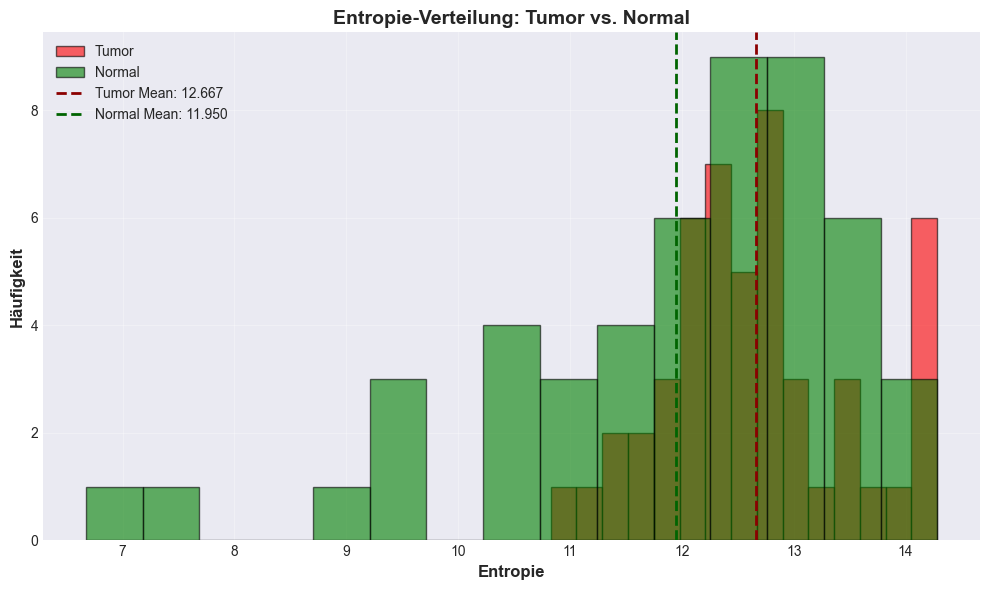


Statistik:
  Tumor - Mean: 12.6666, Std: 0.8392
  Normal - Mean: 11.9500, Std: 1.6160
  Differenz: 0.7166


In [13]:
# Gepaartes Histogramm
fig, ax = plt.subplots(figsize=(10, 6))

# Daten aufteilen
tumor_entropy = df[df['label'] == 'Tumor']['entropy']
normal_entropy = df[df['label'] == 'Normal']['entropy']

# Histogramme plotten
ax.hist(tumor_entropy, bins=15, alpha=0.6, label='Tumor', color='red', edgecolor='black')
ax.hist(normal_entropy, bins=15, alpha=0.6, label='Normal', color='green', edgecolor='black')

# Mittelwerte als vertikale Linien
ax.axvline(tumor_entropy.mean(), color='darkred', linestyle='--', linewidth=2, 
           label=f'Tumor Mean: {tumor_entropy.mean():.3f}')
ax.axvline(normal_entropy.mean(), color='darkgreen', linestyle='--', linewidth=2,
           label=f'Normal Mean: {normal_entropy.mean():.3f}')

ax.set_xlabel('Entropie', fontsize=12, fontweight='bold')
ax.set_ylabel('Häufigkeit', fontsize=12, fontweight='bold')
ax.set_title('Entropie-Verteilung: Tumor vs. Normal', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '10_entropy_histogram_paired.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nStatistik:")
print(f"  Tumor - Mean: {tumor_entropy.mean():.4f}, Std: {tumor_entropy.std():.4f}")
print(f"  Normal - Mean: {normal_entropy.mean():.4f}, Std: {normal_entropy.std():.4f}")
print(f"  Differenz: {abs(tumor_entropy.mean() - normal_entropy.mean()):.4f}")

### 2- Korrelations-Heatmap


In [5]:
# Korrelationsmatrix berechnen
feature_cols = ['entropy', 'variance', 'median']
corr_matrix = df[feature_cols].corr()

print("Korrelationsmatrix:")
print(corr_matrix)

Korrelationsmatrix:
           entropy  variance    median
entropy   1.000000  0.416029  0.114979
variance  0.416029  1.000000  0.125646
median    0.114979  0.125646  1.000000


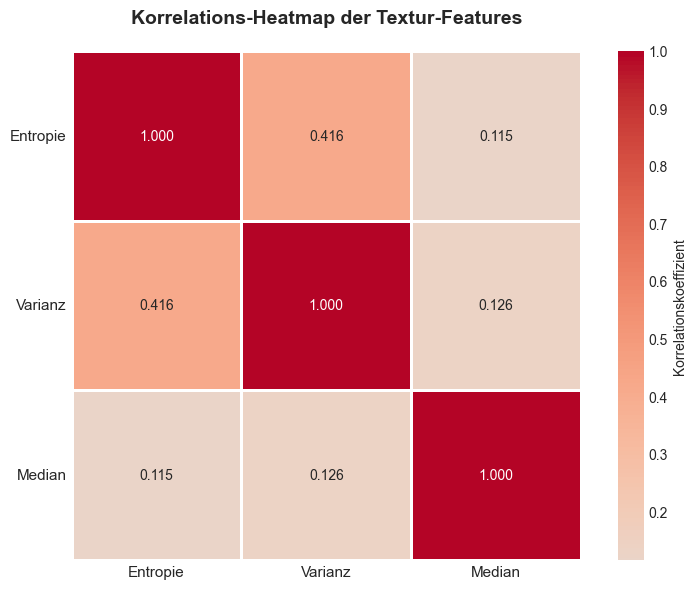

In [6]:
# Heatmap visualisieren
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Korrelationskoeffizient'},
    ax=ax
)

ax.set_title('Korrelations-Heatmap der Textur-Features', fontsize=14, fontweight='bold', pad=20)
ax.set_xticklabels(['Entropie', 'Varianz', 'Median'], fontsize=11)
ax.set_yticklabels(['Entropie', 'Varianz', 'Median'], fontsize=11, rotation=0)

plt.tight_layout()
plt.savefig(RESULTS_DIR / '11_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()


### 3 - Bildvergleich mit Entropie-Werten

In [18]:
# Bestes Beispiel finden: höchste Entropie-Differenz

tumor_high_entropy = df[df['label'] == 'Tumor'].nlargest(1, 'entropy').iloc[0]
normal_low_entropy = df[df['label'] == 'Normal'].nlargest(1, 'entropy').iloc[0]


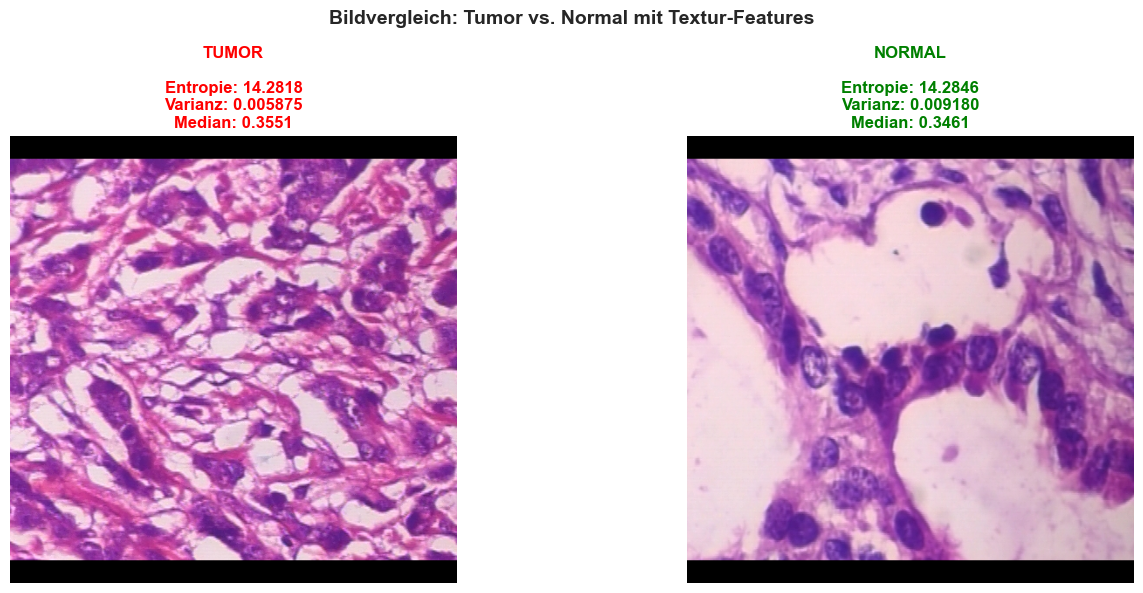

In [19]:
# Bilder laden
tumor_img = io.imread(DATA_DIR /"prepared_patches_p4"/ tumor_high_entropy['filename'])
normal_img = io.imread(DATA_DIR /"prepared_patches_p4"/ normal_low_entropy['filename'])

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Tumor
axes[0].imshow(tumor_img)
axes[0].set_title(
    f"TUMOR\n\nEntropie: {tumor_high_entropy['entropy']:.4f}\nVarianz: {tumor_high_entropy['variance']:.6f}\nMedian: {tumor_high_entropy['median']:.4f}",
    fontsize=12,
    fontweight='bold',
    color='red'
)
axes[0].axis('off')

# Normal
axes[1].imshow(normal_img)
axes[1].set_title(
    f"NORMAL\n\nEntropie: {normal_low_entropy['entropy']:.4f}\nVarianz: {normal_low_entropy['variance']:.6f}\nMedian: {normal_low_entropy['median']:.4f}",
    fontsize=12,
    fontweight='bold',
    color='green'
)
axes[1].axis('off')

plt.suptitle(
    'Bildvergleich: Tumor vs. Normal mit Textur-Features',
    fontsize=14,
    fontweight='bold',
    y=0.98
)
plt.tight_layout()
plt.savefig(RESULTS_DIR / '12_image_comparison_with_entropy.png', dpi=150, bbox_inches='tight')
plt.show()


### Alle Features im Histogramm



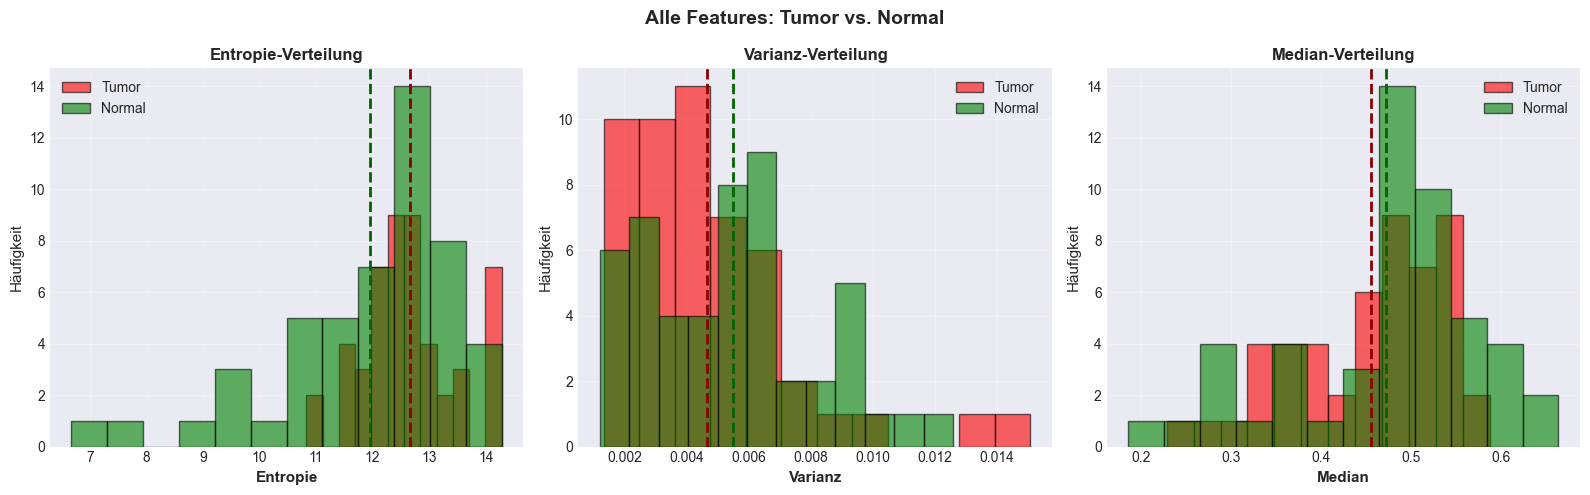

In [20]:
# Alle 3 Features als Histogramme
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

features = [
    ('entropy', 'Entropie'),
    ('variance', 'Varianz'),
    ('median', 'Median')
]

for idx, (feature, label) in enumerate(features):
    tumor_data = df[df['label'] == 'Tumor'][feature]
    normal_data = df[df['label'] == 'Normal'][feature]
    
    axes[idx].hist(tumor_data, bins=12, alpha=0.6, label='Tumor', color='red', edgecolor='black')
    axes[idx].hist(normal_data, bins=12, alpha=0.6, label='Normal', color='green', edgecolor='black')
    
    axes[idx].axvline(tumor_data.mean(), color='darkred', linestyle='--', linewidth=2)
    axes[idx].axvline(normal_data.mean(), color='darkgreen', linestyle='--', linewidth=2)
    
    axes[idx].set_xlabel(label, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Häufigkeit', fontsize=11)
    axes[idx].set_title(f'{label}-Verteilung', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Alle Features: Tumor vs. Normal', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(RESULTS_DIR / '13_all_features_histograms.png', dpi=150, bbox_inches='tight')
plt.show()
